<a href="https://colab.research.google.com/github/initinsharma/NLP_Deep_Learning/blob/master/Text_Preprocessing_using_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLTK - Natural Language Toolkit

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum. NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike. NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open source, community-driven project. 
For more details - www.nltk.org

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cd /content/gdrive/My\ Drive/


In [21]:
!pwd

/content/gdrive/My Drive


#### Loading required libraries

In [0]:
import pandas as pd
import re
import os

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *

from collections import defaultdict

# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

from IPython.display import Image

#!pip install wordcloud
from wordcloud import WordCloud

from itertools import chain

In [0]:
import warnings
warnings.filterwarnings("ignore")

#### Reading data from text files

In [0]:
PATH = os.getcwd()

In [20]:
documents = []     # list of text samples
labels = []        # list of label ids
labels_Index = {}  # dictionary mapping label index to label name

PATH = '/content/gdrive/My Drive/'

TEXT_DATA_DIR = os.path.join(PATH, "docs")

for name in os.listdir(TEXT_DATA_DIR):
    path = os.path.join(TEXT_DATA_DIR, name)
    if os.path.isdir(path):
        label_Id = len(labels_Index)
        labels_Index[label_Id] = name
        for fname in sorted(os.listdir(path)):
            fpath = os.path.join(path, fname)
            f = open(fpath, encoding = "ISO-8859-1")
            t = f.read()
            documents.append(t)
            f.close()
            labels.append(label_Id)

print('Found %s docs.' % len(documents))

Found 36 docs.


In [22]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [23]:
print(labels_Index)

{0: 'obama', 1: 'kalam', 2: 'romney'}


#### Create a dataframe with the documents and the labels 

In [0]:
list_of_tuples = list(zip(documents, labels))

In [0]:
df = pd.DataFrame(list_of_tuples, columns = ['speech_text', 'speaker'])

In [26]:
df

,speech_text,speaker
0,If there is anyone out there who still doubts ...,0
1,I stand here today humbled by the task before ...,0
2,What a scene. What a crowd. Thank you for Virg...,0
3,To Chairman Dean and my great friend Dick Durb...,0
4,"Tonight, after fifty-four hard-fought contests...",0
5,"You know, some were saying that North Carolina...",0
6,I stand before you as someone who is not oppos...,0
7,"On behalf of the great state of Illinois, cros...",0
8,Thank you. It's an honor to be here tonight to...,0
9,"Mr. President, I have come to the floor today ...",0


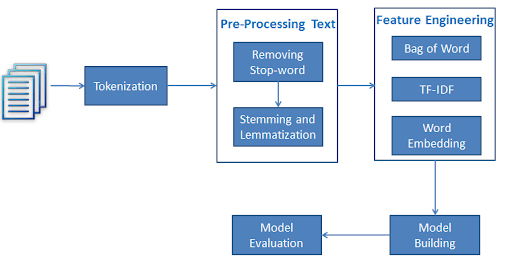

In [27]:
Image("img/NLTK3.png",width=700)

#### Function for Text Pre-processing

In [0]:
def pre_process_text(text):
    
    # 1. Remove non-letters   

    letters_only = re.sub("[^a-zA-Z]", " ", text) 
    
    # 2. Convert to lower case, split into individual words
    
    words = letters_only.lower().split()
    
    # 3. In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))  

    # 4. Remove stop words

    meaningful_words = [w for w in words if not w in stops]
    # meaningful_words = [word for word in meaningful_words if len(word) > 1]
   
    return( " ".join( meaningful_words ))


#### Applying text pre-processing on the final dataframe

In [0]:
df['clean_text'] = df.speech_text.apply(pre_process_text)

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

__Stemmers vs. Lemmatizers__
* Both stemmers and lemmatizers try to bring inflected words to the same form
* Stemmers use an algorithmic approach of removing prefixes and suffixes. The result might not be an actual dictionary word.
* Lemmatizers use a corpus. The result is always a dictionary word.
* Lemmatizers need extra info about the part of speech they are processing.
* Stemmers are faster than lemmatizers

When to use stemmers and when to use lemmatizers? few guidelines:
* If speed is important, use stemmers (lemmatizers have to search through a corpus while stemmers do simple operations on a string)
* If you just want to make sure that the system you are building is tolerant to inflections, use stemmers (If you query for “best hotel in New York”, you would accept an article on “Best hotels in New York 2016″)
* If you need the actual dictionary word, use a lemmatizer. (for example, if you are building a natural language generation system)

How do stemmers work?

* Stemmers are extremely simple to use and very fast. They work by applying different transformation rules on the word until no other transformation can be applied.


#### Function for Lemmatization

In [0]:
# Lemmatize with POS Tag

# WordNet is the lexical database i.e. dictionary for the English language, specifically designed for natural language processing.
# The WordNet is a part of Python's Natural Language Toolkit. It is a large word database of English Nouns, Adjectives, Adverbs and Verbs.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to 'Noun'

def lemmatize_text(preprocessed_text):
    
    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""

        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)


    # 1. Init Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # 2. Lemmatize a Sentence with the appropriate POS tag

    lemmatized_text=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(preprocessed_text)]
    
    # The final processed set of words for each iteration will be stored in 'text_final'
    text_final=(" ".join( lemmatized_text ))
    return text_final


#### Useful link to understand POS tagging
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

#### Applying Lemmatization on cleaned text

In [0]:
df['lemmatized_text'] = df.clean_text.apply(lemmatize_text)

In [37]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

#### Function for Stemming

In [0]:
def stem_text(preprocessed_text):
    
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(txt) for txt in nltk.word_tokenize(preprocessed_text)]
    
    # The final processed set of words for each iteration will be stored in 'text_stem'
    text_stem=(" ".join( stemmed_text ))
    return text_stem

#### Applying Stemming on cleaned text

In [0]:
df['stemmed_text'] = df.clean_text.apply(stem_text)

#### Let us understand the output from different pre-processing steps

In [42]:
# First few rows from Original document
df['speech_text'][0][0:990]

'If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy, tonight is your answer.\n\nIt\x92s the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voice could be that difference.\n\nIt\x92s the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Latino, Asian, Native American, gay, straight, disabled and not disabled \x96 Americans who sent a message to the world that we have never been a collection of Red States and Blue States: we are, and always will be, the United States of America.\n\nIt\x92s the answer that led those who have been told for so long by so many to be cynical, and f

In [43]:
# First few rows from cleaned document
df['clean_text'][0][0:990]

'anyone still doubts america place things possible still wonders dream founders alive time still questions power democracy tonight answer answer told lines stretched around schools churches numbers nation never seen people waited three hours four hours many first time lives believed time must different voice could difference answer spoken young old rich poor democrat republican black white latino asian native american gay straight disabled disabled americans sent message world never collection red states blue states always united states america answer led told long many cynical fearful doubtful achieve put hands arc history bend toward hope better day long time coming tonight day election defining moment change come america received gracious call senator mccain fought long hard campaign fought even longer harder country loves endured sacrifices america us cannot begin imagine better service rendered brave selfless leader congratulate governor palin achieved look forward workin'

In [44]:
# First few rows from lemmatized document
df['lemmatized_text'][0][0:990]

'anyone still doubt america place thing possible still wonder dream founder alive time still question power democracy tonight answer answer told line stretch around school church number nation never see people wait three hour four hour many first time life believe time must different voice could difference answer spoken young old rich poor democrat republican black white latino asian native american gay straight disabled disabled american sent message world never collection red state blue state always united state america answer lead told long many cynical fearful doubtful achieve put hand arc history bend toward hope well day long time come tonight day election define moment change come america receive gracious call senator mccain fought long hard campaign fought even longer harder country love endure sacrifice america u can not begin imagine well service render brave selfless leader congratulate governor palin achieve look forward work renew nation promise month ahead want t'

In [45]:
# First few rows from stemmed document
df['stemmed_text'][0][0:990]

'anyon still doubt america place thing possibl still wonder dream founder aliv time still question power democraci tonight answer answer told line stretch around school church number nation never seen peopl wait three hour four hour mani first time live believ time must differ voic could differ answer spoken young old rich poor democrat republican black white latino asian nativ american gay straight disabl disabl american sent messag world never collect red state blue state alway unit state america answer led told long mani cynic fear doubt achiev put hand arc histori bend toward hope better day long time come tonight day elect defin moment chang come america receiv graciou call senat mccain fought long hard campaign fought even longer harder countri love endur sacrific america us can not begin imagin better servic render brave selfless leader congratul governor palin achiev look forward work renew nation promis month ahead want thank partner journey man campaign heart spoke m'

* Here we will be considering Lemmatized text for calculating TF-IDF

#### Frequent words count

In [46]:
top_N = 30

join_text = df['lemmatized_text'].str.cat(sep=' ')

words = nltk.tokenize.word_tokenize(join_text)

word_dist = nltk.FreqDist(words)
output = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(output)

         Word  Frequency
0     america        310
1        work        264
2         one        257
3     science        245
4    american        232
5           u        227
6      nation        218
7   president        209
8      people        207
9        year        202
10       make        197
11       time        182
12        job        168
13         go        164
14       need        161
15      would        159
16    country        157
17       life        156
18       like        156
19      world        155
20      great        153
21      child        151
22        new        150
23       know        150
24       come        149
25    student        147
26       well        146
27       take        146
28        say        141
29       give        139


#### Plotting frequency plot

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


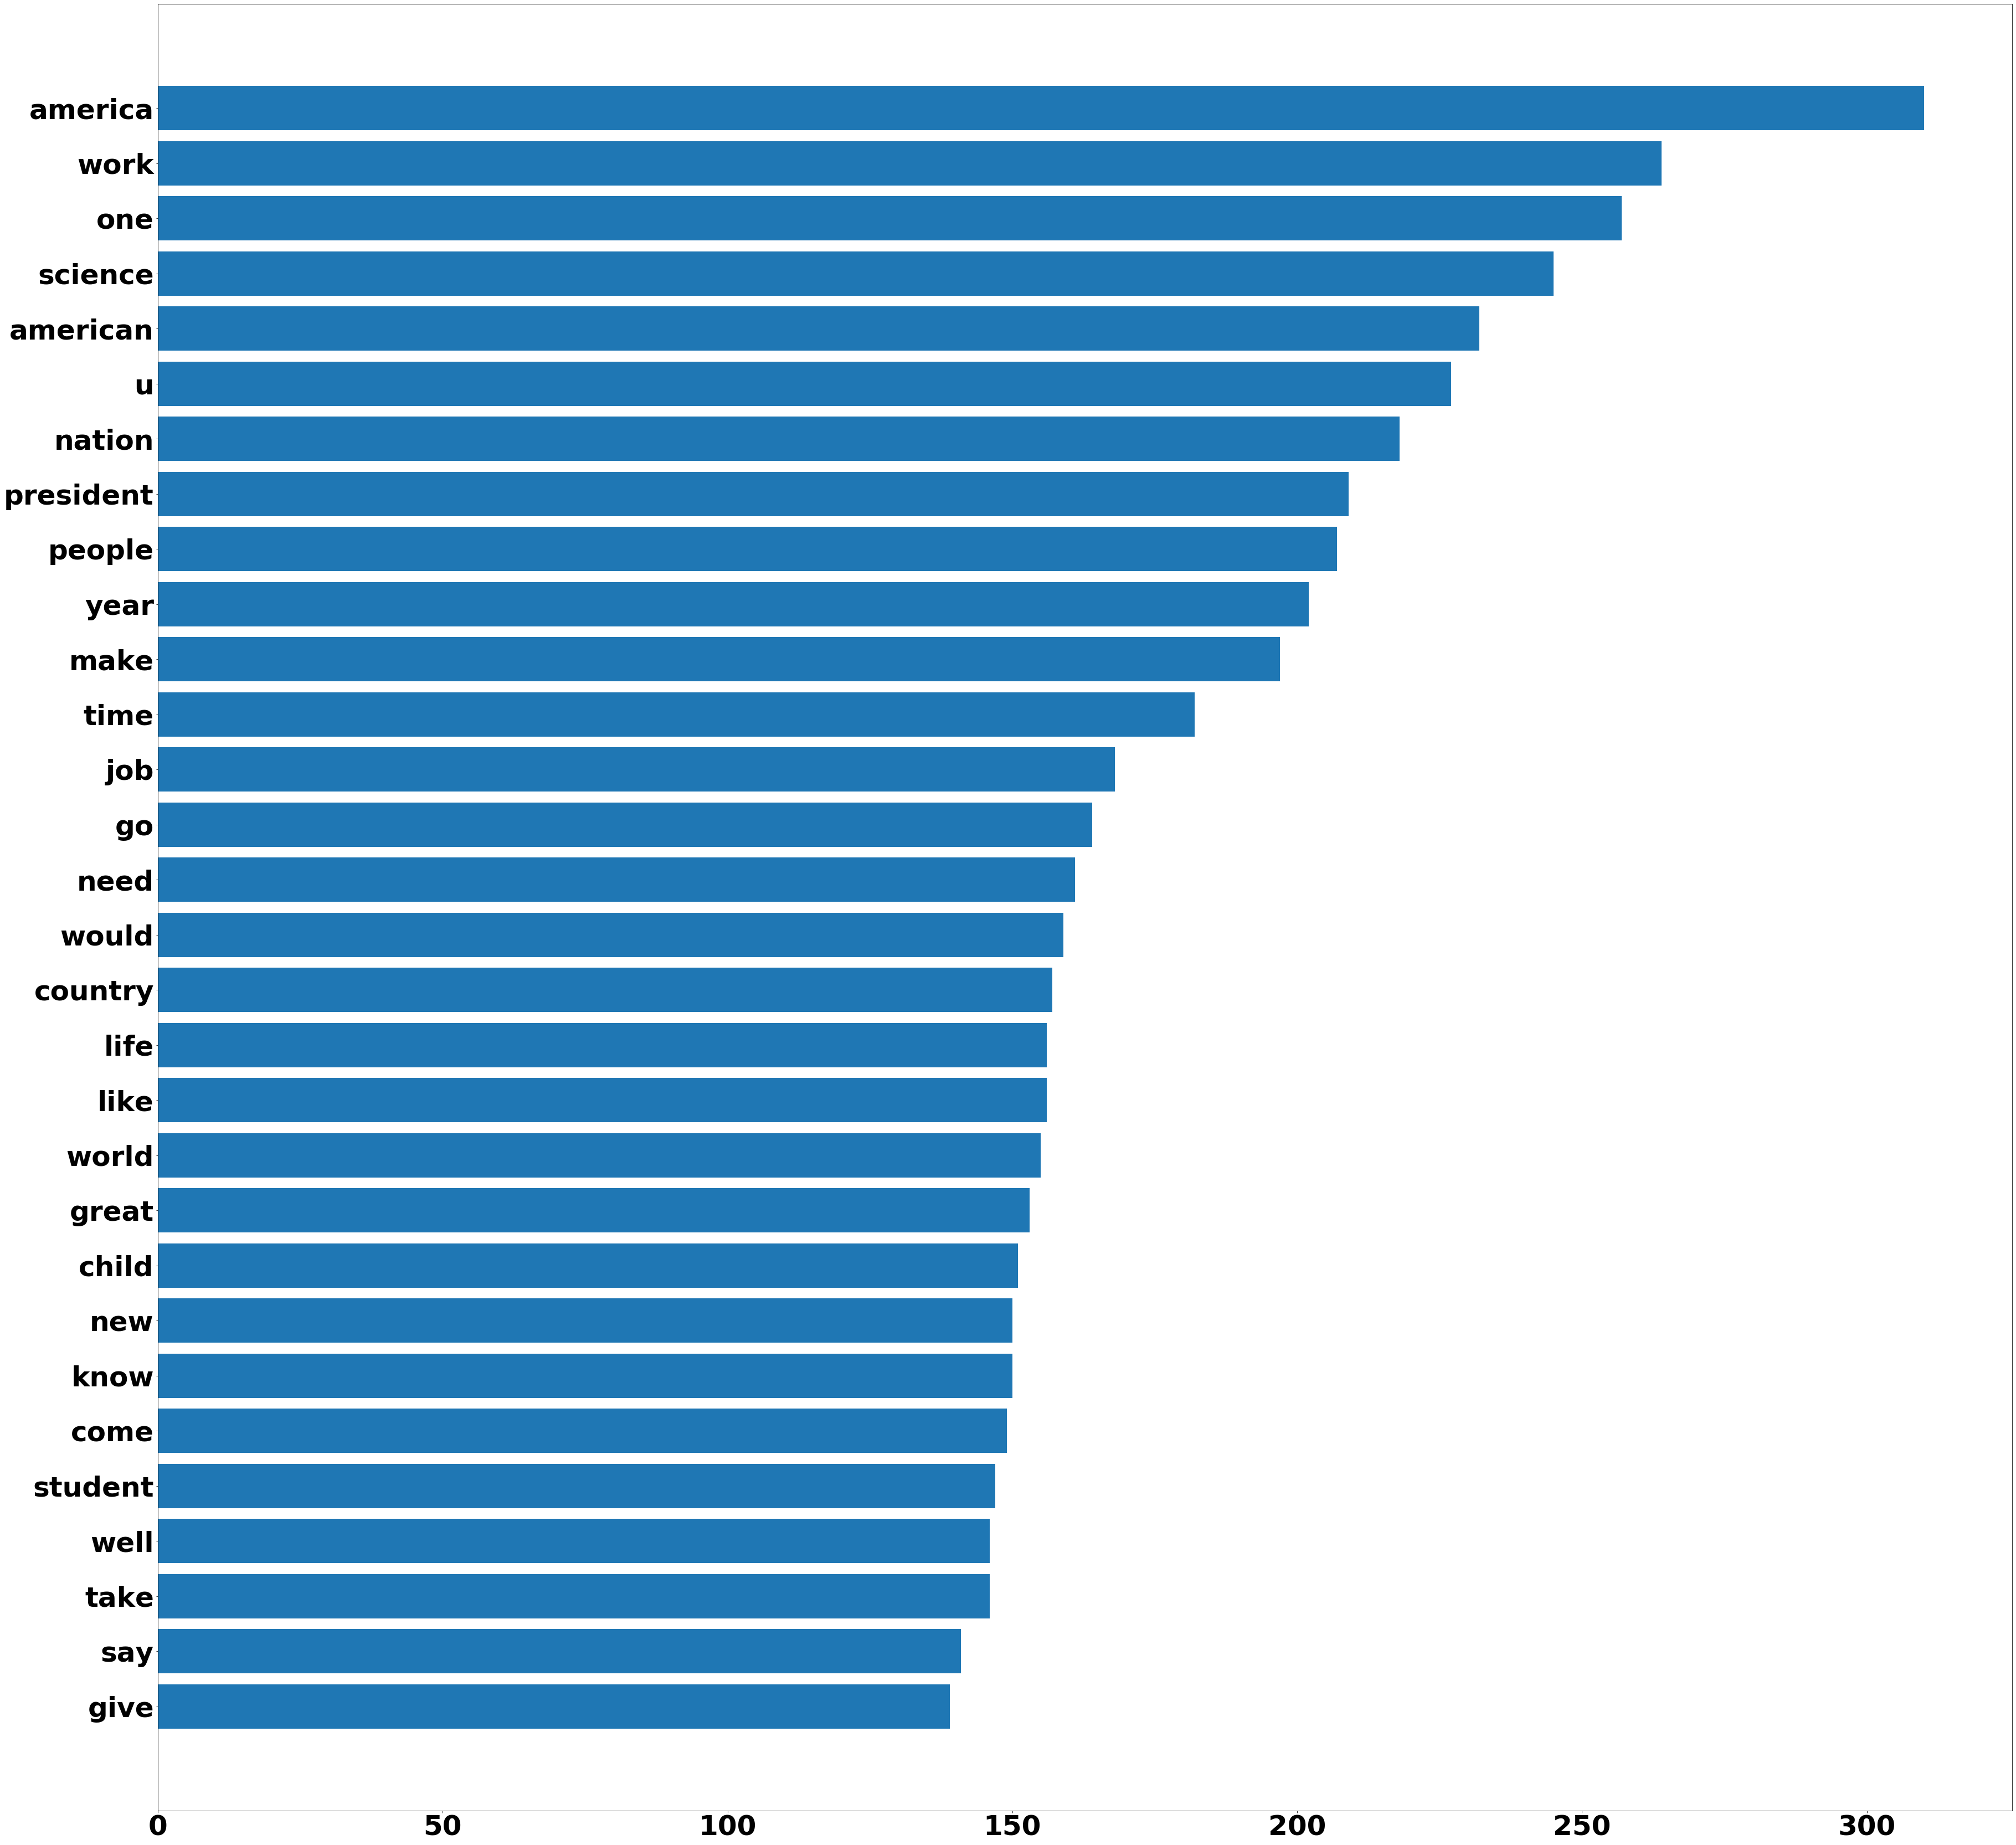

In [47]:
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(60,60))
plt.barh(output['Word'], output['Frequency'])
plt.gca().invert_yaxis()
plt.show()

#### Visualizing most frequent words using Word cloud

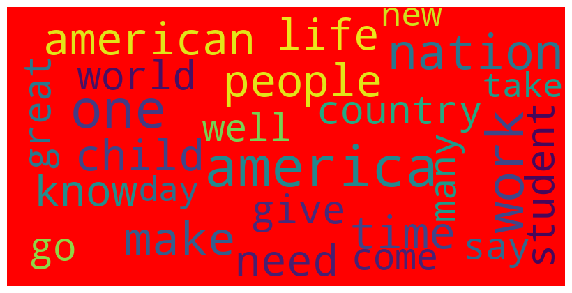

In [48]:
wordcloud = WordCloud(max_font_size=80, max_words=25, background_color="red",width=800, height=400, margin=2,).generate(' '.join(df['lemmatized_text']))
plt.figure( figsize=(10,6) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Calculate TF-TDF
####  Term Frequency: This summarizes how often a given word appears within a document
#### Inverse Document Frequency: This down scales words that appear a lot across documents

In [49]:
# Extending stop words list
stop_words = stopwords.words('english')

stop_words.extend(['one','use','give','u','go','take','know','come','say'])

Tfidf_vect = TfidfVectorizer(stop_words=stop_words, max_df=0.9, min_df=0.2)

Tfidf_mat=Tfidf_vect.fit_transform(df['lemmatized_text'])

print(Tfidf_mat.shape)

(36, 657)


In [50]:
terms = Tfidf_vect.get_feature_names()
print(type(terms))
terms[:5]

<class 'list'>


['ability', 'able', 'achieve', 'across', 'act']

In [51]:
# Coverting to dense matrix and putting in a dataframe to view the Tfidf matrix
Dense_mat = Tfidf_mat.todense()
Tfidf_Mat = pd.DataFrame(Dense_mat, columns=Tfidf_vect.get_feature_names())

# Tfidf_Mat.shape
Tfidf_Mat.head()

,ability,able,achieve,across,act,action,address,administration,afford,age,ago,agree,ahead,aim,alone,already,also,always,america,american,among,another,answer,anyone,anything,apply,area,arm,around,arrive,ask,attack,available,away,back,bad,base,become,begin,behind,...,village,vision,visit,vital,voice,volunteer,vote,wage,wait,walk,want,war,washington,watch,water,way,wealth,week,well,whatever,whether,white,willing,win,wish,within,without,witness,woman,wonder,word,worker,world,would,write,year,yes,yet,young,youth
0,0.000000,0.000000,0.07682,0.018658,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.023061,0.030939,0.079288,0.00000,0.030939,0.025505,0.000000,0.044673,0.261211,0.162971,0.0,0.000000,0.132147,0.032351,0.028496,0.000000,0.0,0.032351,0.041990,0.000000,0.03841,0.000000,0.0,0.000000,0.074632,0.023827,0.00000,0.000000,0.067009,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.113982,0.032351,0.085487,0.000000,0.028496,0.000000,0.016669,0.024640,0.025505,0.059324,0.000000,0.031550,0.032351,0.000000,0.029874,0.000000,0.000000,0.079288,0.000000,0.026429,0.0,0.0,0.046122,0.032351,0.104974,0.088985,0.000000,0.000000,0.078874,0.030698,0.000000,0.092095,0.199469,0.029662,0.064946,0.0
1,0.030174,0.000000,0.01873,0.054589,0.025775,0.025775,0.0,0.000000,0.057856,0.083371,0.022490,0.000000,0.000000,0.02779,0.030174,0.024874,0.033430,0.021784,0.181963,0.099336,0.0,0.000000,0.051551,0.000000,0.000000,0.030174,0.0,0.000000,0.020475,0.000000,0.01873,0.000000,0.0,0.000000,0.036393,0.023238,0.02403,0.000000,0.065351,0.000000,...,0.030174,0.021113,0.000000,0.028928,0.000000,0.000000,0.000000,0.028928,0.000000,0.000000,0.000000,0.048060,0.000000,0.028928,0.053488,0.046153,0.063102,0.024874,0.058269,0.000000,0.099494,0.000000,0.051551,0.000000,0.0,0.0,0.044981,0.000000,0.102377,0.028928,0.089962,0.051551,0.107691,0.014969,0.000000,0.044908,0.027790,0.057856,0.021113,0.0
2,0.000000,0.000000,0.00000,0.018595,0.052681,0.000000,0.0,0.000000,0.059124,0.000000,0.022983,0.000000,0.000000,0.00000,0.000000,0.000000,0.034162,0.022261,0.204546,0.040605,0.0,0.019709,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.041848,0.000000,0.00000,0.027330,0.0,0.068950,0.111570,0.047494,0.00000,0.000000,0.044522,0.056799,...,0.000000,0.000000,0.000000,0.000000,0.198797,0.032242,0.028400,0.000000,0.000000,0.028400,0.066450,0.000000,0.025419,0.000000,0.000000,0.047165,0.000000,0.000000,0.014886,0.032242,0.000000,0.026340,0.131702,0.026340,0.0,0.0,0.022983,0.032242,0.167393,0.000000,0.045967,0.000000,0.047165,0.045892,0.000000,0.061190,0.028400,0.000000,0.021576,0.0
3,0.000000,0.022221,0.00866,0.025239,0.000000,0.000000,0.0,0.014588,0.053499,0.000000,0.031195,0.055804,0.035752,0.00000,0.055804,0.011500,0.061825,0.020143,0.218741,0.238828,0.0,0.008917,0.000000,0.014588,0.012849,0.000000,0.0,0.000000,0.009467,0.000000,0.01732,0.012365,0.0,0.020797,0.050479,0.010744,0.00000,0.008917,0.000000,0.000000,...,0.000000,0.000000,0.012365,0.000000,0.000000,0.000000,0.025698,0.040125,0.000000,0.051396,0.022548,0.044441,0.115004,0.080249,0.012365,0.021339,0.014588,0.034501,0.101028,0.014588,0.046002,0.000000,0.011917,0.011917,0.0,0.0,0.041594,0.000000,0.085202,0.000000,0.020797,0.083421,0.028452,0.055369,0.023835,0.076133,0.025698,0.000000,0.078094,0.0
4,0.000000,0.018900,0.00000,0.014312,0.000000,0.000000,0.0,0.000000,0.136516,0.021858,0.017689,0.023733,0.000000,0.00000,0.000000,0.000000,0.026294,0.034267,0.128807,0.265646,0.0,0.030338,0.000000,0.049632,0.000000,0.000000,0.0,0.049632,0.016104,0.024816,0.00000,0.000000,0.0,0.000000,0.014312,0.018277,0.00000,0.000000,0.102801,0.065574,...,0.000000,0.000000,0.000000,0.000000,0.043716,0.000000,0.021858,0.000000,0.021858,0.021858,0.051144,0.056701,0.097819,0.022753,0.000000,0.000000,0.024816,0.019564,0.126033,0.000000,0.000000,0.020273,0.040546,0.020273,0.0,0.0,0.000000,0.000000,0.096627,0.000000,0.017689,0.060820,0.036301,0.000000,0.000000,0.094191,0.000000,0.000000,0.016606,0.0


### K-means Clustering

In [52]:
num_clusters = 3

km = KMeans(n_clusters=num_clusters, random_state=143)

km.fit(Tfidf_mat)
clusters = km.labels_.tolist()
print(clusters,"\n")

centers = km.cluster_centers_
print(f"The cluster centers are {centers} \n")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

The cluster centers are [[0.01147462 0.04373769 0.0395802  ... 0.         0.00789218 0.00515348]
 [0.00841527 0.00950356 0.01436004 ... 0.01626107 0.02836962 0.00543121]
 [0.00828811 0.00873353 0.03135922 ... 0.00305717 0.0902046  0.0704246 ]] 



### Getting the top words from each cluster

In [53]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[0.01147462 0.04373769 0.0395802  ... 0.         0.00789218 0.00515348]
 [0.00841527 0.00950356 0.01436004 ... 0.01626107 0.02836962 0.00543121]
 [0.00828811 0.00873353 0.03135922 ... 0.00305717 0.0902046  0.0704246 ]]
(3, 657)


#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [54]:
km.cluster_centers_.argsort()

array([[146, 463, 159, ..., 477, 133, 574],
       [169, 139, 595, ..., 433,  19,  18],
       [379, 115, 553, ..., 277, 558, 501]])

In [55]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[574, 133, 477, ..., 159, 463, 146],
       [ 18,  19, 433, ..., 595, 139, 169],
       [501, 558, 277, ..., 553, 115, 379]])

In [56]:
print("Top words per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
print("\n")
for i in range(num_clusters):
    for ind in order_centroids[i, :6]: # replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')
    print("\n")

Top words per cluster:


['technology'],['development'],['research'],['science'],['mission'],['area'],

['america'],['american'],['president'],['people'],['job'],['obama'],

['science'],['student'],['india'],['unique'],['teacher'],['laboratory'],



In [57]:
df['cluster_group'] = clusters
cluster_df = pd.DataFrame(df)
cluster_df['cluster_group'].value_counts()

1    24
2     6
0     6
Name: cluster_group, dtype: int64

In [58]:
cluster_df

,speech_text,speaker,clean_text,lemmatized_text,stemmed_text,cluster_group
0,If there is anyone out there who still doubts ...,0,anyone still doubts america place things possi...,anyone still doubt america place thing possibl...,anyon still doubt america place thing possibl ...,1
1,I stand here today humbled by the task before ...,0,stand today humbled task us grateful trust bes...,stand today humble task u grateful trust besto...,stand today humbl task us grate trust bestow m...,1
2,What a scene. What a crowd. Thank you for Virg...,0,scene crowd thank virginia crowd chants yes le...,scene crowd thank virginia crowd chant yes let...,scene crowd thank virginia crowd chant ye let ...,1
3,To Chairman Dean and my great friend Dick Durb...,0,chairman dean great friend dick durbin fellow ...,chairman dean great friend dick durbin fellow ...,chairman dean great friend dick durbin fellow ...,1
4,"Tonight, after fifty-four hard-fought contests...",0,tonight fifty four hard fought contests primar...,tonight fifty four hard fought contest primary...,tonight fifti four hard fought contest primari...,1
5,"You know, some were saying that North Carolina...",0,know saying north carolina would game changer ...,know say north carolina would game changer ele...,know say north carolina would game changer ele...,1
6,I stand before you as someone who is not oppos...,0,stand someone opposed war circumstances civil ...,stand someone oppose war circumstance civil wa...,stand someon oppos war circumst civil war one ...,1
7,"On behalf of the great state of Illinois, cros...",0,behalf great state illinois crossroads nation ...,behalf great state illinois crossroad nation l...,behalf great state illinoi crossroad nation la...,1
8,Thank you. It's an honor to be here tonight to...,0,thank honor tonight celebrate one courageous c...,thank honor tonight celebrate one courageous c...,thank honor tonight celebr one courag compassi...,1
9,"Mr. President, I have come to the floor today ...",0,mr president come floor today address pending ...,mr president come floor today address pending ...,mr presid come floor today address pend legisl...,1


#### Fetching the most frequent words from each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [0]:
## Step 1
cluster_df['tokenized_text'] = [text.split(' ') for text in cluster_df['lemmatized_text']]

In [0]:
## Step 2
grouped_text = cluster_df.groupby('cluster_group')['tokenized_text']

In [61]:
## Fetch entire tokenized text for specific group
grouped_text.get_group(0)

13    [research, mission, double, food, production, ...
14    [dear, friend, happy, address, interact, facul...
18    [science, reciprocate, wish, upon, star, make,...
19    [matter, would, like, talk, life, street, boy,...
21    [see, three, dream, take, shape, vision, missi...
23    [sustainable, development, refers, mode, human...
Name: tokenized_text, dtype: object

In [62]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)
    
frequent_words_df.head()

,values,counts,cluster_id
0,"[technology, development, science, system, far...","[83, 58, 55, 52, 51, 50, 46, 42, 41, 41, 39, 3...",0
1,"[america, american, u, president, people, work...","[309, 232, 214, 205, 184, 173, 164, 163, 154, ...",1
2,"[science, student, friend, one, india, school,...","[185, 119, 67, 65, 61, 58, 58, 55, 54, 53, 52,...",2


In [0]:
cluster1_top_words = str(frequent_words_df.loc[0,'values'][:20])
cluster2_top_words = str(frequent_words_df.loc[1,'values'][:20])
cluster3_top_words = str(frequent_words_df.loc[2,'values'][:20])

#### Visualizing top words for each cluster using Word Cloud

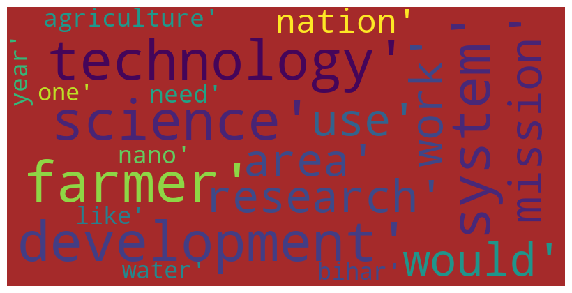

In [65]:
wordcloud = WordCloud(max_font_size=80, background_color="brown",width=800, height=400, margin=2,).generate(cluster1_top_words)
plt.figure( figsize=(10,8) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

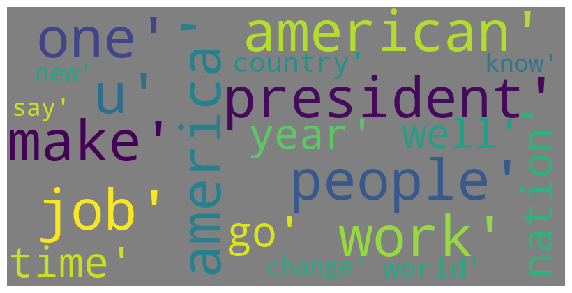

In [66]:
wordcloud = WordCloud(max_font_size=80, background_color="gray",width=800, height=400, margin=2,).generate(cluster2_top_words)
plt.figure( figsize=(10,8) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

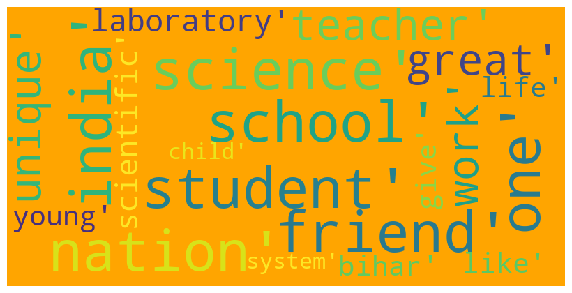

In [67]:
wordcloud = WordCloud(max_font_size=80, background_color="orange",width=800, height=400, margin=2,).generate(cluster3_top_words)
plt.figure( figsize=(10,8) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()